In [1]:
"""
This program is designed to build a machine learning model that predicts the price of various agriculture products.
The dataset used for training the model is in CSV format and has the following structure:
       Date     Rice    Wheat  Atta (Wheat)  Gram Dal  Tur/Arhar Dal  Urad Dal  Moong Dal  Masoor Dal   Sugar  ...  Vanaspati (Packed)  Soya Oil (Packed)  Sunflower Oil (Packed)  Palm Oil (Packed)     Gur  Tea Loose  Salt Pack (Iodised)  Potato   Onion  Tomato
0  2016-01-01   29.50   30.50        26.67     70.50         155.00     160.00    105.75       90.00   32.75  ...              79.25               88.0                    92.25             59.25   43.00      215.0               16.25   20.50   23.25    29.5
1  2016-01-02   29.60   31.40        27.50     71.40         154.60     161.20    108.20       92.50   33.00  ...              82.00               88.0                    92.00             59.00   45.00      216.0               16.60   20.40   23.60    32.0
2  2016-01-03   29.60   31.40        27.50     71.40         154.00     161.20    108.20       92.50   33.00  ...              82.00               88.0                    92.00             59.00   45.00      216.0               16.60   20.40   23.60    35.0
3  2016-01-04   29.60   31.40        27.50     71.40         151.60     160.20    107.20       90.50   34.40  ...              82.00               88.0                    92.00             59.00   45.00      216.0               16.60   21.40   23.00    41.4
4  2016-01-05   29.50   31.75        27.50     71.75         151.50     161.50    107.50       90.50   34.25  ...              80.25               88.0                    91.75             58.75   45.75      215.0               17.00   21.25   22.75    41.0
[6 rows x 23 columns]
"""

'\nThis program is designed to build a machine learning model that predicts the price of various agriculture products.\nThe dataset used for training the model is in CSV format and has the following structure:\n       Date     Rice    Wheat  Atta (Wheat)  Gram Dal  Tur/Arhar Dal  Urad Dal  Moong Dal  Masoor Dal   Sugar  ...  Vanaspati (Packed)  Soya Oil (Packed)  Sunflower Oil (Packed)  Palm Oil (Packed)     Gur  Tea Loose  Salt Pack (Iodised)  Potato   Onion  Tomato\n0  2016-01-01   29.50   30.50        26.67     70.50         155.00     160.00    105.75       90.00   32.75  ...              79.25               88.0                    92.25             59.25   43.00      215.0               16.25   20.50   23.25    29.5\n1  2016-01-02   29.60   31.40        27.50     71.40         154.60     161.20    108.20       92.50   33.00  ...              82.00               88.0                    92.00             59.00   45.00      216.0               16.60   20.40   23.60    32.0\n2  2016-0

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Load the dataset
data = pd.read_csv(r"data\cleansing\filled\mean_filled.csv")

In [4]:
# Display the first 5 rows of the dataset
print(data.head())

         Date  Rice  Wheat  Atta (Wheat)  Gram Dal  Tur/Arhar Dal  Urad Dal  \
0  2016-01-01  29.5  30.50         26.67     70.50          155.0     160.0   
1  2016-01-02  29.6  31.40         27.50     71.40          154.6     161.2   
2  2016-01-03  29.6  31.40         27.50     71.40          154.0     161.2   
3  2016-01-04  29.6  31.40         27.50     71.40          151.6     160.2   
4  2016-01-05  29.5  31.75         27.50     71.75          151.5     161.5   

   Moong Dal  Masoor Dal  Sugar  ...  Vanaspati (Packed)  Soya Oil (Packed)  \
0     105.75        90.0  32.75  ...               79.25               88.0   
1     108.20        92.5  33.00  ...               82.00               88.0   
2     108.20        92.5  33.00  ...               82.00               88.0   
3     107.20        90.5  34.40  ...               82.00               88.0   
4     107.50        90.5  34.25  ...               80.25               88.0   

   Sunflower Oil (Packed)  Palm Oil (Packed)    Gu

In [5]:
# remove the columns except the date and rice from the data
data = data.drop(columns=['Wheat', 'Atta (Wheat)', 'Gram Dal', 'Tur/Arhar Dal',
       'Urad Dal', 'Moong Dal', 'Masoor Dal', 'Sugar', 'Milk @',
       'Groundnut Oil (Packed)', 'Mustard Oil (Packed)', 'Vanaspati (Packed)',
       'Soya Oil (Packed)', 'Sunflower Oil (Packed)', 'Palm Oil (Packed)',
       'Gur', 'Tea Loose', 'Salt Pack (Iodised)', 'Potato', 'Onion', 'Tomato'])

In [6]:
# Display the first 5 rows of the dataset
print(data.head())

         Date  Rice
0  2016-01-01  29.5
1  2016-01-02  29.6
2  2016-01-03  29.6
3  2016-01-04  29.6
4  2016-01-05  29.5


In [7]:
# keep the data by date limit the data for the year 2022-2024
data['Date'] = pd.to_datetime(data['Date'])
data = data[data['Date'].dt.year >= 2022]

In [8]:
# display the first 5 rows of the dataset
print(data.head())


           Date   Rice
2192 2022-01-01  46.88
2193 2022-01-02  46.89
2194 2022-01-03  47.33
2195 2022-01-04  47.00
2196 2022-01-05  47.44


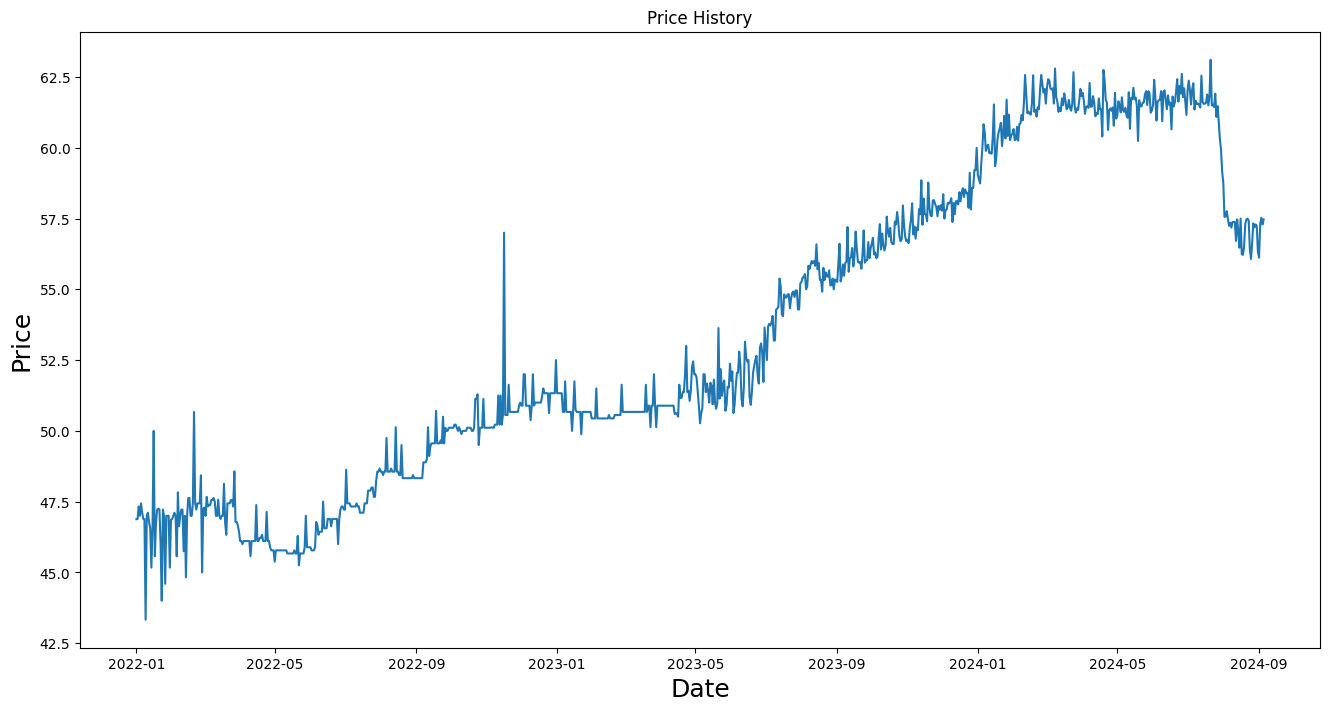

In [9]:
# plot the data
plt.figure(figsize=(16,8))
plt.title('Price History')
plt.plot(data['Date'], data['Rice'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

In [10]:
# build the lstm model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

In [11]:
# create a new dataframe with only the 'Rice' column
data = data.filter(['Rice'])
dataset = data.values

In [12]:
# get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [13]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [14]:
# create the training data set
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

In [15]:
# create the dataset x_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [16]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [18]:
# build the lstm model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

c:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

871/871 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.0134


In [21]:
# create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [22]:
# convert the data to a numpy array
x_test = np.array(x_test)


In [23]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [24]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step


In [25]:
# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
print(rmse)

0.7961205482482913


C:\Users\krish\AppData\Local\Temp\ipykernel_688\3702564713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


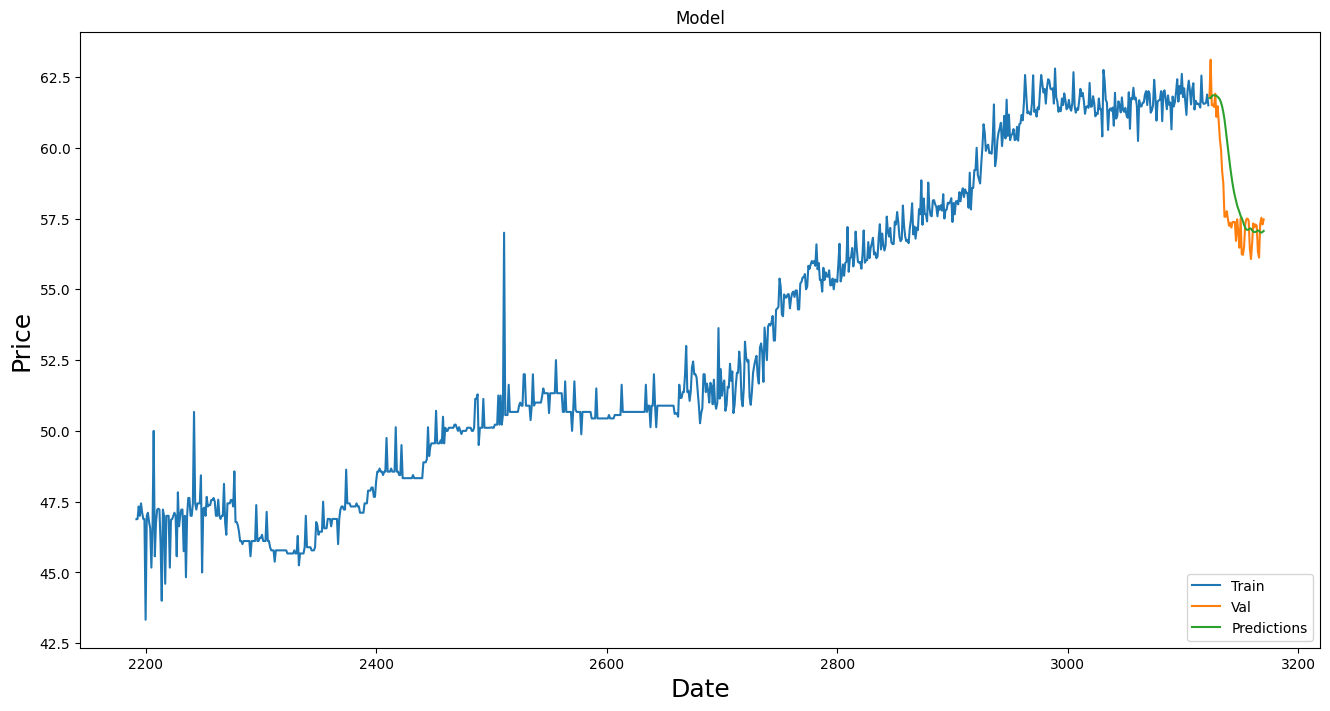

In [26]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.plot(train['Rice'])
plt.plot(valid[['Rice', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [27]:
# calculate accuracy
accuracy = 100 - rmse
print(accuracy)

99.2038794517517
